#### Importamos las librerias necesarias para realizar nuetro EDA:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
%matplotlib inline

#### Cargamos el datasets movies_transformado.csv, resultado de la primer parte del proyecto en un DataFrame, revisamos su estructura y su informacion:

In [2]:
df = pd.read_csv('movies_transformado.csv', low_memory=False)

In [3]:
df.head()

belongs_to_collection      budget                      genres  \
0            Toy Story Collection  30000000.0   Animation, Comedy, Family   
1                             NaN  65000000.0  Adventure, Fantasy, Family   
2       Grumpy Old Men Collection         0.0             Romance, Comedy   
3                             NaN  16000000.0      Comedy, Drama, Romance   
4  Father of the Bride Collection         0.0                      Comedy   

      id original_language                                           overview  \
0    862                en  Led by Woody, Andy's toys live happily in his ...   
1   8844                en  When siblings Judy and Peter discover an encha...   
2  15602                en  A family wedding reignites the ancient feud be...   
3  31357                en  Cheated on, mistreated and stepped on, the wom...   
4  11862                en  Just when George Banks has recovered from his ...   

   popularity                               production_companies  \
0   21.946943                            Pixar Animation Studios   
1   17.015539  TriStar Pictures, Teitler Film, Interscope Com...   
2   11.712900                       Warner Bros., Lancaster Gate   
3    3.859495             Twentieth Century Fox Film Corporation   
4    8.387519         Sandollar Productions, Touchstone Pictures   

       production_countries release_date      revenue  runtime  \
0  United States of America   1995-10-30  373554033.0     81.0   
1  United States of America   1995-12-15  262797249.0    104.0   
2  United States of America   1995-12-22          0.0    101.0   
3  United States of America   1995-12-22   81452156.0    127.0   
4  United States of America   1995-02-10   76578911.0    106.0   

    spoken_languages    status  \
0            English  Released   
1  English, Français  Released   
2            English  Released   
3            English  Released   
4            English  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  vote_average     return  release_year  
0                    Toy Story           7.7  12.451801          1995  
1                      Jumanji           6.9   4.043035          1995  
2             Grumpier Old Men           6.5   0.000000          1995  
3            Waiting to Exhale           6.1   5.090760          1995  
4  Father of the Bride Part II           5.7   0.000000          1995

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45463 non-null  float64
 2   genres                 43021 non-null  object 
 3   id                     45463 non-null  int64  
 4   original_language      45452 non-null  object 
 5   overview               44509 non-null  object 
 6   popularity             45460 non-null  float64
 7   production_companies   45463 non-null  object 
 8   production_countries   45463 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45463 non-null  float64
 11  runtime                45203 non-null  float64
 12  spoken_languages       41508 non-null  object 
 13  status                 45379 non-null  object 
 14  tagline                20412 non-null  object 
 15  ti

#### Generamos un informe detallado con Pandas Profiling, lo guardamos en un archivo html a modo ilustrativo:

In [5]:
profile = ProfileReport(df)
profile.to_file('informe.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile

##### Hay columnas que se consideran irrelevantes para el modelo:

* released_date: ya existe una columna con el anio de estreno asi que para una recomendacion el dia y el mes de lanzamiento lo consideramos irrelevante.
* belongs_to_collection: tiene mas del 90% de valores nulos o desconocidos y para una recomendacion podemos apoyarnos en otros datos.
* tagline: tiene mas del 50% de valores nulos o desconocidos, aporta informacion relevante pero podemos apoyarnos de otros datos.
* budget, revenue y por ende return: todas estas columnas tienen mas 80% de ceros que corresponden a valores desconocidos.

In [7]:
df = df.drop(['release_date', 'belongs_to_collection', 'tagline', 'budget', 'revenue', 'return'], axis=1)

##### Eliminamos filas duplicadas:

In [10]:
df = df.drop_duplicates()

#### Consideramos que deberiamos quedarnos solo con las filas cuyo status sea released, ya que no seria bueno recomendar una pelicula cuyo estado no sea released. Luego la columna quedaria con una distribucion uniforme al tener solo released en sus datos, por lo que procedemos a eliminarla.

In [11]:
df = df[df['status'] == 'Released']
df = df.drop("status", axis=1)

##### Aplicamos una transformación logarítmica a las columnas con distribuciones sesgadas:

In [13]:
df["popularity"] = np.log1p(df["popularity"])
df["release_year"] = np.log1p(df["release_year"])

In [14]:
df.head()

genres     id original_language  \
0   Animation, Comedy, Family    862                en   
1  Adventure, Fantasy, Family   8844                en   
2             Romance, Comedy  15602                en   
3      Comedy, Drama, Romance  31357                en   
4                      Comedy  11862                en   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...    3.133185   
1  When siblings Judy and Peter discover an encha...    2.891235   
2  A family wedding reignites the ancient feud be...    2.542617   
3  Cheated on, mistreated and stepped on, the wom...    1.580935   
4  Just when George Banks has recovered from his ...    2.239381   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures, Teitler Film, Interscope Com...   
2                       Warner Bros., Lancaster Gate   
3             Twentieth Century Fox Film Corporation   
4         Sandollar Productions, Touchstone Pictures   

       production_countries  runtime   spoken_languages  \
0  United States of America     81.0            English   
1  United States of America    104.0  English, Français   
2  United States of America    101.0            English   
3  United States of America    127.0            English   
4  United States of America    106.0            English   

                         title  vote_average  release_year  
0                    Toy Story           7.7        7.5989  
1                      Jumanji           6.9        7.5989  
2             Grumpier Old Men           6.5        7.5989  
3            Waiting to Exhale           6.1        7.5989  
4  Father of the Bride Part II           5.7        7.5989

#### Realizamos un nuevo informe para seguir con la toma de decisiones:

In [15]:
profile2 = ProfileReport(df)
profile2.to_file('informe2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile2

#### Visualizamos las palabras más frecuentes en los títulos:

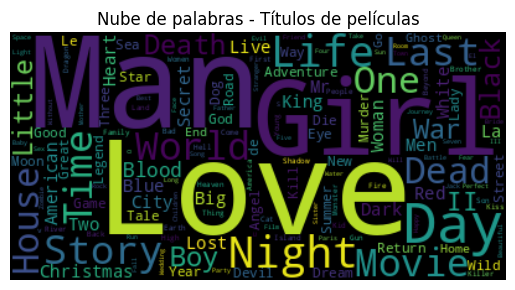

In [17]:
wordcloud = WordCloud().generate(' '.join(df['title'].dropna().values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Títulos de películas')
plt.show()

#### Tratamos los valores faltantes:

In [18]:
df.fillna({'genres': 'Unknown', 'original_language': 'Unknown', 'overview': '', 'spoken_languages': 'Unknown'}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44998 entries, 0 to 45462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                44998 non-null  object 
 1   id                    44998 non-null  int64  
 2   original_language     44998 non-null  object 
 3   overview              44998 non-null  object 
 4   popularity            44998 non-null  float64
 5   production_companies  44998 non-null  object 
 6   production_countries  44998 non-null  object 
 7   runtime               44747 non-null  float64
 8   spoken_languages      44998 non-null  object 
 9   title                 44998 non-null  object 
 10  vote_average          44998 non-null  float64
 11  release_year          44998 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 5.5+ MB


In [20]:
df.to_csv('movies_EDA_relevantes.csv', index=False)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Seleccionar las columnas relevantes
relevant_cols = ['title', 'genres', 'original_language', 'overview']

# Crear un nuevo DataFrame con las columnas relevantes
df_relevant = df[relevant_cols].copy()



# Codificación one-hot para la columna 'genres'
one_hot_encoder = OneHotEncoder(sparse=False)
genres_encoded = one_hot_encoder.fit_transform(df_relevant[['genres']])

# Crear una matriz de características para el resumen (overview) utilizando TF-IDF
vectorizer = TfidfVectorizer()
overview_features = vectorizer.fit_transform(df_relevant['overview']).toarray()

# Concatenar las matrices de características y las características categóricas
features_matrix = pd.DataFrame(overview_features, columns=vectorizer.get_feature_names())
features_matrix = pd.concat([features_matrix, pd.DataFrame(genres_encoded, columns=one_hot_encoder.categories_[0])], axis=1)


/home/darwin/.local/share/virtualenvs/MLOps_Darwin-PXcmFR4w/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 25.4 GiB for an array with shape (44998, 75688) and data type float64

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Seleccionar las columnas relevantes
relevant_cols = ['title', 'genres', 'original_language', 'overview']

# Crear un nuevo DataFrame con las columnas relevantes
df_relevant = df[relevant_cols].copy()

# Tratar los valores faltantes
df_relevant.fillna({'genres': 'Unknown', 'original_language': 'Unknown', 'overview': ''}, inplace=True)

# Codificación one-hot para la columna 'genres'
one_hot_encoder = OneHotEncoder(sparse=False)
genres_encoded = one_hot_encoder.fit_transform(df_relevant[['genres']])

# Crear una matriz de características dispersa para el resumen (overview) utilizando TF-IDF
vectorizer = TfidfVectorizer()
overview_features = vectorizer.fit_transform(df_relevant['overview'])

# Concatenar las matrices de características y las características categóricas
features_matrix = pd.DataFrame(overview_features.toarray(), columns=vectorizer.get_feature_names())
features_matrix = pd.concat([features_matrix, pd.DataFrame(genres_encoded, columns=one_hot_encoder.categories_[0])], axis=1)


/home/darwin/.local/share/virtualenvs/MLOps_Darwin-PXcmFR4w/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 25.4 GiB for an array with shape (44998, 75688) and data type float64

In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Seleccionar las columnas relevantes
relevant_cols = ['title', 'genres', 'original_language', 'overview']

# Crear un nuevo DataFrame con las columnas relevantes
df_relevant = df[relevant_cols].copy()

# Tratar los valores faltantes
df_relevant.fillna({'genres': 'Unknown', 'original_language': 'Unknown', 'overview': ''}, inplace=True)

# Codificación one-hot para la columna 'genres'
one_hot_encoder = OneHotEncoder(sparse=False)
genres_encoded = one_hot_encoder.fit_transform(df_relevant[['genres']])

# Crear una matriz de características dispersa para el resumen (overview) utilizando TF-IDF
vectorizer = TfidfVectorizer()
overview_features = vectorizer.fit_transform(df_relevant['overview'])

# Concatenar las matrices de características y las características categóricas
features_matrix = hstack([overview_features, genres_encoded])

# Crear un DataFrame a partir de la matriz dispersa
features_df = pd.DataFrame.sparse.from_spmatrix(features_matrix)




/home/darwin/.local/share/virtualenvs/MLOps_Darwin-PXcmFR4w/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Entrenar el modelo de recomendación basado en contenido
def train_content_based_model(df, features_df):
    # Calcular la similitud del coseno entre las características
    similarity_matrix = cosine_similarity(features_df)

    # Crear un diccionario que mapee el título de la película a su índice en el DataFrame
    title_to_index = {title: index for index, title in enumerate(df['title'])}

    return similarity_matrix, title_to_index

# Generar recomendaciones basadas en el contenido
def generate_content_based_recommendations(movie_title, similarity_matrix, title_to_index, top_n=5):
    # Obtener el índice de la película objetivo
    movie_index = title_to_index[movie_title]

    # Obtener la fila de similitud correspondiente a la película objetivo
    similarity_scores = similarity_matrix[movie_index]

    # Obtener los índices de las películas más similares
    top_indices = similarity_scores.argsort()[::-1][1:top_n+1]

    # Obtener los títulos de las películas recomendadas
    recommended_movies = df.iloc[top_indices]['title'].values

    return recommended_movies


In [43]:
# Entrenar el modelo
similarity_matrix, title_to_index = train_content_based_model(df, features_df)

# Generar recomendaciones para una película específica
movie_title = 'Toy Story'
recommendations = generate_content_based_recommendations(movie_title, similarity_matrix, title_to_index)

# Imprimir las recomendaciones
print(f"Recomendaciones para la película '{movie_title}':")
for movie in recommendations:
    print(movie)


MemoryError: Unable to allocate 26.7 GiB for an array with shape (79734, 44998) and data type float64